In [5]:
import seaborn as sns
import sys
import os
current = os.path.abspath('..')
sys.path.append(current)
from helpers import read_results

In [22]:
# Usage:
bucket = "nasa-cryo-scratch"
results_directory = "h5cloud/benchmark_results/2023-08-11-1"
df = read_results.concatenate_csv_from_s3(bucket, prefix=results_directory)
filtered_df = df[df['Name'].str.contains('ArrMean')]
filtered_df

,Name,Data Format,Run Time,Result
0,H5pyArrMean,original,111.043289,1015.982032
1,H5pyArrMean,h5repack,196.246487,1015.982032
2,XarrayArrMean,original,372.126884,1015.982483
5,XarrayArrMean,h5repack,520.851295,1015.982483
6,H5CoroArrMean,original,72.435367,1015.982032
8,H5CoroArrMean,h5repack,50.173250,1015.982032
10,H5DataFrameArrMean,original,61.616208,1015.982900
12,H5DataFrameArrMean,h5repack,182.140856,1015.982900
13,XarrayArrMean,kerchunk-original,74.610242,1015.982032
14,XarrayArrMean,kerchunk-repacked,79.412478,1015.982032


In [23]:
# Step 3: Use the groupby method to group and compute the mean
grouped = filtered_df.groupby(['Name', 'Data Format', 'Result'])['Run Time'].mean().reset_index()
print(grouped)

                 Name        Data Format       Result    Run Time
0       H5CoroArrMean           h5repack  1015.982032   54.098936
1       H5CoroArrMean           original  1015.982032   82.413335
2  H5DataFrameArrMean           h5repack  1015.982900  170.295775
3  H5DataFrameArrMean           original  1015.982900   92.479220
4         H5pyArrMean           h5repack  1015.982032  196.045753
5         H5pyArrMean           original  1015.982032  106.220002
6       XarrayArrMean           h5repack  1015.982483  541.922431
7       XarrayArrMean  kerchunk-original  1015.982032   71.574740
8       XarrayArrMean  kerchunk-repacked  1015.982032   67.436537
9       XarrayArrMean           original  1015.982483  375.543792


<AxesSubplot: xlabel='Name', ylabel='Run Time'>

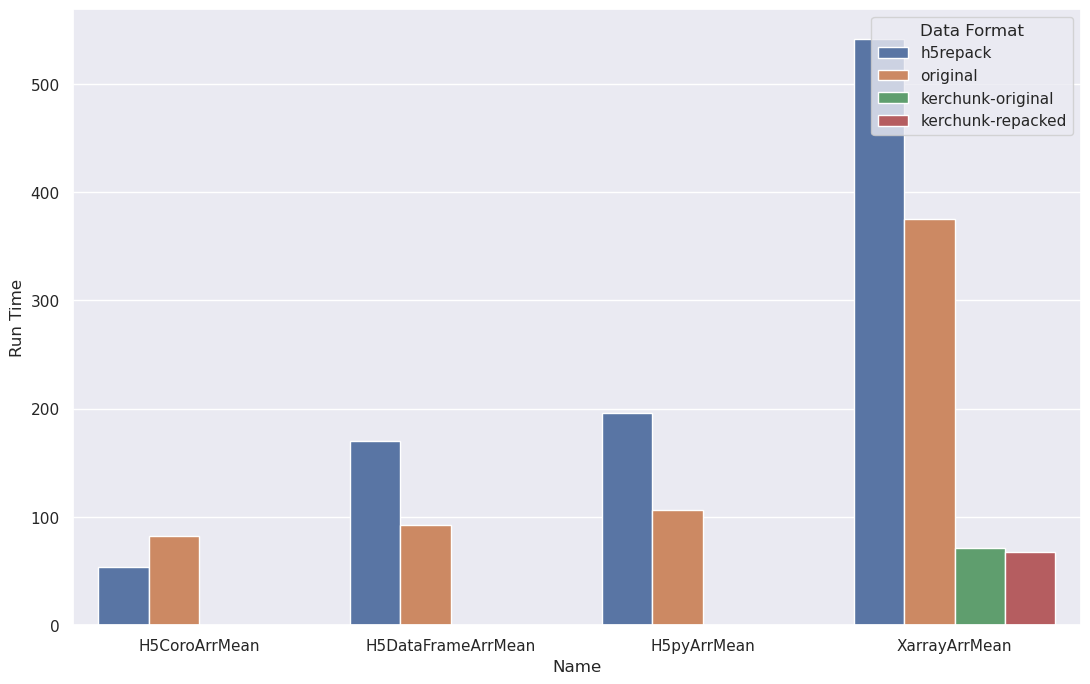

In [24]:
sns.set(rc={'figure.figsize':(13,8)})
sns.barplot(data=grouped, x="Name", y="Run Time", hue="Data Format")